In [31]:
# STEP 1
# Import NumPy for numerical calculation, Pandas for handling data and visualization with seaborn and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=(12,6)
sns.set

# STEP 2
#Import the dataset
happiness_data=pd.read_csv('world_happiness_report_2019.csv')

# STEP 3
# We can observe the dataset by checking a few of the rows using the head() function,
# which returns the first five records from the dataset.
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [32]:
# STEP 4
# Using shape function, we can observe the dimensions of the data
happiness_data.shape

(156, 9)

In [33]:
# There are 9 columns and 156 entries

In [34]:
# STEP 5
# The info() method shows some of the characteristics of the data such as Column Name
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [35]:
# Feedback: We can observe that the data which we have doesn’t have any missing values. 

In [36]:
#STEP 6
# We use describe() function, which shows basic statistical characteristics of each numerical feature
# number of non-missing values (count column), mean, standard deviation, range, median, 0.25, 0.50, 0.75 quartiles.
happiness_data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [37]:
# STEP 7
# We can check for duplicate values in our dataset as the presence of duplicate values will hamper the accuracy of our ML model.
duplicate_Values=happiness_data.duplicated()
print(duplicate_Values.sum())
happiness_data[duplicate_Values]

0


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


<function matplotlib.pyplot.show(close=None, block=None)>

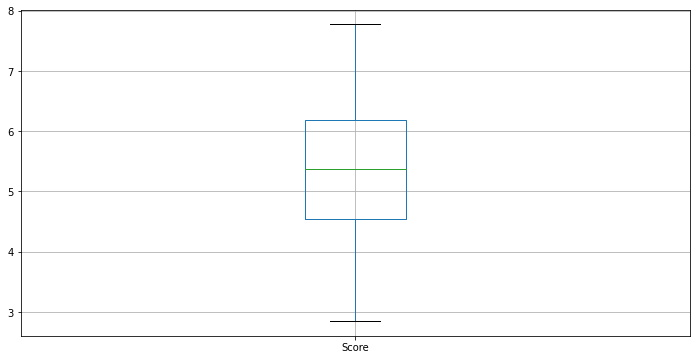

In [38]:
# STEP 8
# Handling the outliers in the data, i.e. the extreme values in the data. 
# We can find the outliers in our data using a Boxplot.
happiness_data.boxplot(column=['Score'])
plt.show

In [39]:
# Feedback: we can observe that our data is now free from outliers

In [40]:
# STEP 9
# We can find the pairwise correlation between the different columns of the data using the corr() method. 
#(Note – All non-numeric data type column will be ignored.)

happiness_data.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


<AxesSubplot:>

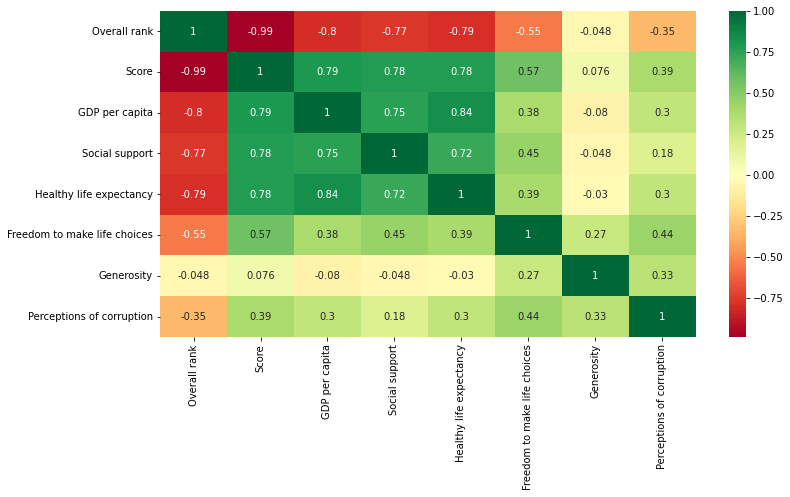

In [41]:
# STEP 10
# we create a heatmap using Seaborn to visualize the correlation between the different columns of our data
sns.heatmap(happiness_data.corr(),annot=True,cmap='RdYlGn')

In [42]:
# Feedback: we can see a high correlation between:
# GPD (economy) and Healthy life expenctancy = 0,84
# Score and GPD(economy) = 0,79
# Score and social support = 0,78

In [43]:
# STEP 11
# using Seaborn, we will visualize the relation between Economy (GDP per Capita)and Happiness Score by using a regression plot

<AxesSubplot:xlabel='GDP per capita', ylabel='Score'>

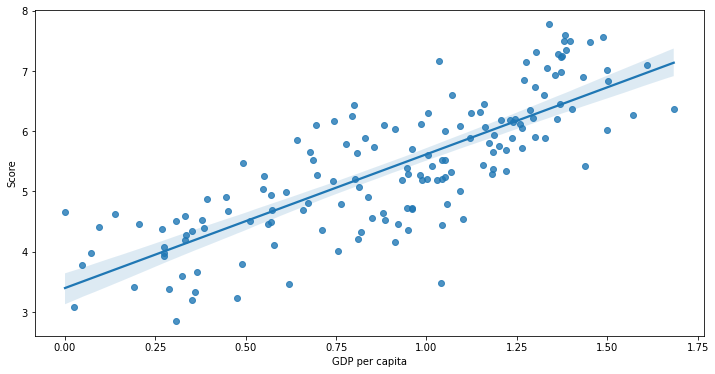

In [44]:
sns.regplot(x='GDP per capita', y='Score', data=happiness_data)

In [ ]:
# Feedback: As the Economy increases, the Happiness Score increases as well as denoting a positive relation.